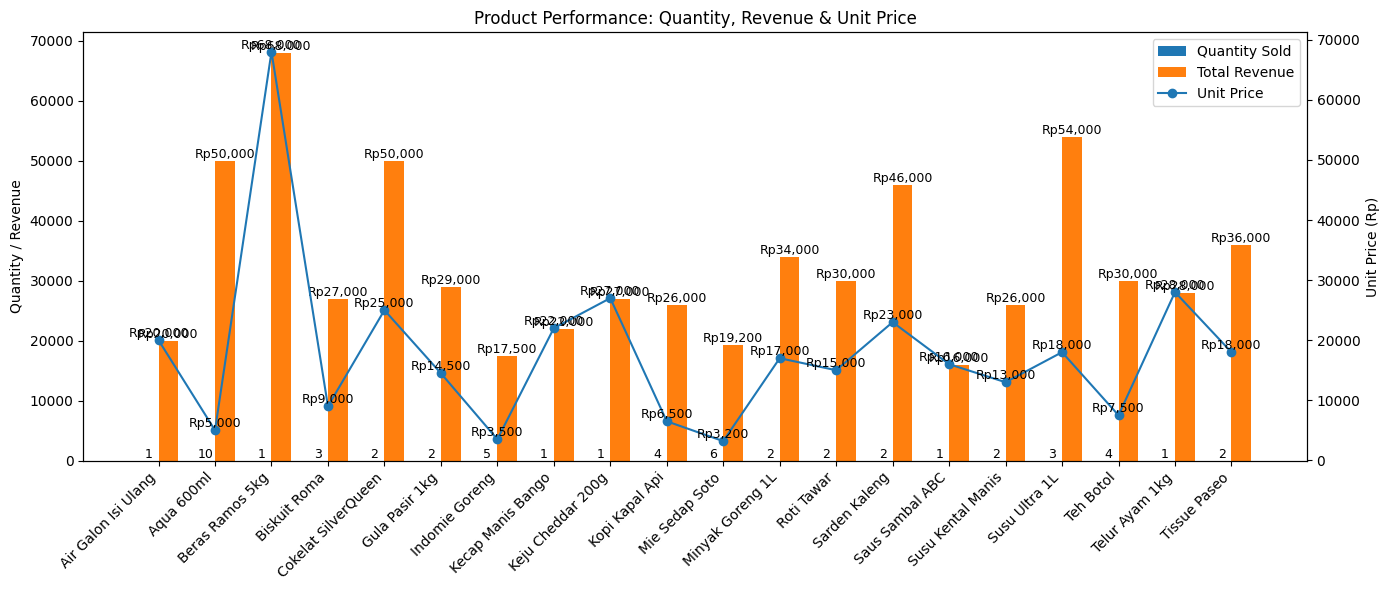

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("data/sales_data.csv")

# Hitung total sales
df["total_sales"] = df["quantity"] * df["price"]

# Summary per product
summary = df.groupby("product", as_index=False).agg({
    "quantity": "sum",
    "total_sales": "sum",
    "price": "mean"  # harga satuan rata-rata
})

# Posisi bar
x = np.arange(len(summary))
width = 0.35

# Figure & axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar charts
bars_qty = ax1.bar(x - width/2, summary["quantity"], width, label="Quantity Sold")
bars_rev = ax1.bar(x + width/2, summary["total_sales"], width, label="Total Revenue")

ax1.set_ylabel("Quantity / Revenue")
ax1.set_title("Product Performance: Quantity, Revenue & Unit Price")
ax1.set_xticks(x)
ax1.set_xticklabels(summary["product"], rotation=45, ha="right")

# ===== ANNOTATION BAR (DETAIL ANGKA) =====
for bar in bars_qty:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=9
    )

for bar in bars_rev:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"Rp{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# Second axis for unit price
ax2 = ax1.twinx()
line_price, = ax2.plot(
    x,
    summary["price"],
    marker="o",
    linestyle="-",
    label="Unit Price"
)
ax2.set_ylabel("Unit Price (Rp)")

# ===== ANNOTATION LINE (HARGA SATUAN) =====
for i, price in enumerate(summary["price"]):
    ax2.text(
        x[i],
        price,
        f"Rp{price:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# Gabung legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.tight_layout()
plt.show()
